# CSMODEL MCO1

### Group 9:
### Nieva, Samuel
### Opalla, Rijan
### Quinzon, Christopher


## I. Dataset Description

The dataset acquired covers the possible key indicators of heart disease among US citizens. The dataset is a public online resource available on Kaggle.com and was acquired from the Center for Disease Control and Prevention (CDC), a government organization of the United States taking part in the Behavioral Risk Factor Surveillance System (BRFSS). The data was acquired observationally as there was no form of treatment applied to the respondents. The collection was done via an annual telephone survey in all 50 states plus the District of Columbia and three more U.S. territories. Moreso, the dataset contains 319,795 rows and 18 columns with each row representing an observation of a person and the columns representing the responses of the individual to different questions about their health status. The answers of the respondents are valued as 9 booleans, 5 strings, and 4 decimals. No other external files are combined with the single file for this machine project. 

## Variables

### Boolean Variables
As mentioned earlier, the dataset contains 9 boolean variables. All of which answer a specific question and contain the values `Yes` and `No`, or both of the previous answers, given special conditions as is the case with `Diabetic`.

#### Heart Disease

The variable captures the responses of respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).

#### Smoking

The variable describes this as whether or not: "Respondents have smoked at least 100 cigarettes in their lives". The dataset notes that 5 packs of cigarettes is equivalent to 100 cigarettes.

#### AlcoholDrinking

This variable asks respondents whether or not they were heavy drinkers, described as adult men having more than 14 drinks per week and adult women having more than 7 drinks per week.

#### Stroke

The variable contains the observations to the question "Have you ever had/Were you ever told you had a stroke?"

#### DiffWalking

The variable asks whether or not respondents have a serious difficulty walking or climbing stairs.

#### PhysicalActivity

The variable describes this as adults who reported doing physical activity or exercise during the past 30 days other than their regular job.

#### Asthma

The variable describes this as whether or not respondents have asthma

#### KidneyDisease

The variable describes this as whether or not respondents ever had kidney disease excluding kidney stones, bladder infection, or incontinence.

#### SkinCancer

The variable describes this as whether or not respondents ever had skin cancer.

### String Variables
The following are the description of the  variables that contain strings.

#### Sex

The variable contains the respondent's sex.

#### Race

The variable contains the respondent's ethnicity and imputed race/ethnicity value.

#### GenHealth

The variable contains the answer to the question "Would you say that your health is Very Good, Good, Fair, Poor"?

#### Diabetic

The variable describes this as whether or not the respondents have diabetes.

It has four unique values: `Yes`, `No`, `Yes (during pregnancy)`, and `No, borderline diabetes`, which means that the respondent has Type 2 or Prediabetes.

#### AgeCategory

This variable contains the respondent's age category. The variable contains a fourteen-level age category starting from `18-24` to `80 or older`.

### Decimal Variables
The following are the description of the  variables that contain decimals.

#### BMI

The variable describes this as the respondents "BMI". BMI or Body Mass Index is a numerical value derived from a person's height and weight and is used to measure a person's body fat.

Its value is the numerical value of the respondent's BMI.

#### SleepTime

The variable answers the question "On average, how many hours of sleep do you get in a 24-hour period?"

Each observation shows the respondent's average sleep time.

#### PhysicalHealth

The variable contains the answer to the question: "Now thinking about your mental health, for how many days during the past 30 days was your physical health not good?" 
Its value represents the number of days, which answers the question.

#### MentalHealth

The variable contains the answer to the question: "Thinking about your mental health, for how many days during the past 30 days was your mental health not good?" 
Its value represents the number of days, which answers the question.

## II. Data Cleaning
The following code blocks are for importing the necessary libraries as well as the dataset needed.

In [32]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

In [33]:
heart_df = pd.read_csv("heart_2020_cleaned.csv")

The next segment displays general information within the dataset and the datatypes of the various features.

In [34]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [35]:
heart_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


The dataset has already been cleaned beforehand as stated by the dataset's authors, however, the procedures for data cleaning discussed in class will still be performed to ensure that the data is clean and all entries are valid in terms of their content and datatype.

### Checking for missing values

In [37]:
heart_df.isnull().any()

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

### Checking for inconsistencies and multiple representations

In [38]:
print("No. of unique values per column:\n",heart_df.nunique())

No. of unique values per column:
 HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64


Checking for all the unique values for each variable used.

### Heart Disease

In [39]:
heart_df['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

### BMI

In [40]:
heart_df['BMI'].unique()

array([16.6 , 20.34, 26.58, ..., 62.42, 51.46, 46.56])

### Smoking

In [41]:
heart_df['Smoking'].unique()

array(['Yes', 'No'], dtype=object)

### Diabetic

In [42]:
heart_df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

Based on the results above, the data does not contain any missing values. Also, all features contain valid entries and datatypes. 

## III. Exploratory Data Analysis

The group has identified several questions which would be answered through exploratory data analysis. The following code segments show the libraries to be imported.

In [43]:
import matplotlib.pyplot as plt
from scipy import stats
# sets the theme of the charts
# plt.style.use('seaborn-darkgrid')

# %matplotlib inline

%matplotlib inline

Since some columns contain boolean values, we must first apply one-hot encoding to aid in the analysis. In the case of the unique values of the `diabetic` variable, we have combined the value of `Yes (during pregnancy)` to the value `Yes` and `No, borderline diabetes` to the value `No`. This study will only focus on type 1 diabetes, therefore the term "borderline diabetes" is considered as prediabetes/type 2 diabetes.  

In [44]:
heart_df = heart_df.replace({'Yes': 1, 'No':0, 'No, borderline diabetes': 0, 'Yes (during pregnancy)': 1})
heart_df


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,Male,60-64,Hispanic,1,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,Male,35-39,Hispanic,0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,Female,45-49,Hispanic,0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,Female,25-29,Hispanic,0,0,Good,12.0,0,0,0


### Is there a relationship between heart disease and BMI?

Body Mass Index (BMI) refers to the measure of body fat based on an individual's weight and height. It has four different categories: underweight, normal weight, overweight, and obesity. People with BMIs that are <18.5 are considered underweight, while an index between 18.5-24.9 fall under normal weight. On the other hand, values from 25-29.9 would fall under overweight. Lastly, a BMI of 30 or greater would fall under obesity.

Given this, we would like to find out if the dataset shows a relationship between heart disease and an individual's BMI.

To answer this question, we must group the entire dataset accordingly.

In [46]:
hd_bmi = heart_df[['HeartDisease', 'BMI']]
hd_bmi

,HeartDisease,BMI
0,0,16.60
1,0,20.34
2,0,26.58
3,0,24.21
4,0,23.71
...,...,...
319790,1,27.41
319791,0,29.84
319792,0,24.24
319793,0,32.81


The following segment shows the observations grouped by `HeartDisease`.

In [48]:
hd_bmi.groupby('HeartDisease').count()

,BMI
HeartDisease,
0,292422
1,27373


The correlation between the two is calculated as follows:

In [49]:
stats.pointbiserialr(hd_bmi['HeartDisease'],hd_bmi['BMI'])

PointbiserialrResult(correlation=0.05180319065578059, pvalue=6.7794550351556225e-189)

Since the variables `HeartDisease` and `BMI` are binary and continuous variables respectively, the point biserial correlation was used. Similar to other correlation coefficients, the point biserial correlation coefficient result varies between -1 and +1, with a value of 0 implying no correlation. Moreover, the resulting coefficient is mathematically equivalent to the Pearson's correlation coefficient. This can be seen in the following code segment.

In [50]:
hd_bmi.corr()

,HeartDisease,BMI
HeartDisease,1.000000,0.051803
BMI,0.051803,1.000000


The calculated correlation between the two variables is **0.0518**. From the result, the two variables are positively correlated. However, the r-value suggests a very weak relationship between the two variables. 

To visualize the data, the following histogram plots the frequency of numerical data across the two variables:

Text(0.5, 0, 'BMI')

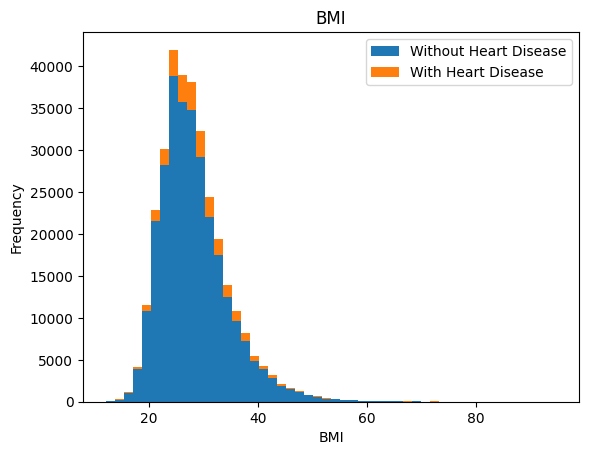

In [51]:
pd.DataFrame({'Without Heart Disease': hd_bmi.groupby('HeartDisease').get_group(0).BMI,
              'With Heart Disease':   hd_bmi.groupby('HeartDisease').get_group(1).BMI}).plot.hist(bins=50, stacked=True)
plt.title('BMI')
plt.xlabel('BMI')

Based on the visualization above, it can be observed that the distribution is positively skewed. The histogram also shows that people with heart disease have more observations than those without heart disease, especially around the higher BMI ranges. Although this result may be skewed by the disproportionate number of observations from both groups.

### Is there a relationship between Diabetes and Heart Disease?

According to the World Health Organization (WHO), diabetes is classified as a chronic and metabolic diesease caused by increase of blood sugar level which may damage the heart, blood vessels, eyes, kidneys, and nerves over time. <br>

Our variable of interest for this EDA question will be `HeartDisease` and `Diabetic`, therefore we will acquire the columns of the two in the dataframe and group them by the presence of diabetes:

In [52]:
hd_diabetic = heart_df.groupby('Diabetic')['HeartDisease'].value_counts()
diabetic_df = pd.DataFrame([hd_diabetic[0], hd_diabetic[1]], index=['Not diabetic', 'Diabetic']).transpose()
diabetic_df


,Not diabetic,Diabetic
HeartDisease,,
0,258126,34296
1,18308,9065


We visualize the relationship of the 2 variables via bar graph:

Text(0, 0.5, 'Count')

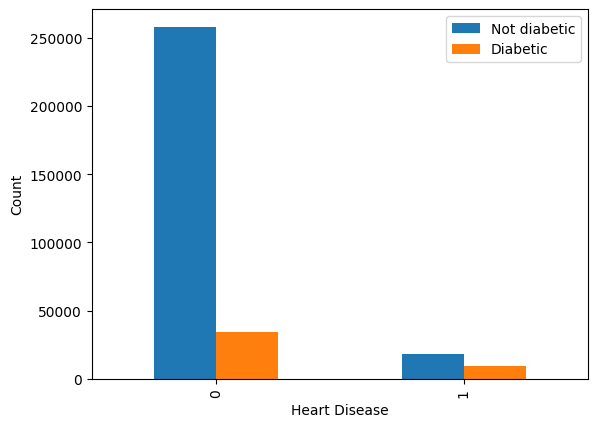

In [53]:
diabetic_df.plot.bar()

plt.xlabel('Heart Disease')
plt.ylabel('Count')


In [54]:
heart_df['Diabetic'].value_counts()

0    276434
1     43361
Name: Diabetic, dtype: int64

Since there is a great difference between the number of diabetic and non-diabetic respondents, we analyze the relationship by observing the proportionality of respondents with no diabetes but with heart disease and those that have diabetes and heart disease:

In [55]:
non_diabetic_df = heart_df[heart_df['Diabetic'] == 0]
no_diabetes_no_hd = non_diabetic_df[non_diabetic_df ['HeartDisease']==0].shape[0]
no_diabetes_with_hd = non_diabetic_df[non_diabetic_df ['HeartDisease']==1].shape[0]

with_diabetic_df = heart_df[heart_df['Diabetic'] == 1]
with_diabetes_no_hd = with_diabetic_df[with_diabetic_df ['HeartDisease']==0].shape[0]
with_diabetes_with_hd = with_diabetic_df[with_diabetic_df ['HeartDisease']==1].shape[0]

In [56]:
print('No diabetes and no Heart Disease:', no_diabetes_no_hd)
print('No diabetes but with Heart Disease:', no_diabetes_with_hd, '\n')

print('Diabetic with no Heart Disease', with_diabetes_no_hd)
print('Diabetic with Heart Disease', with_diabetes_with_hd, '\n')

print('Percentage of no diabetes but with Heart Disease: {:.2f}%'.format(no_diabetes_with_hd/non_diabetic_df.shape[0] * 100))
print('Percentage of diabetic with Heart Disease: {:.2f}%'.format(with_diabetes_with_hd/with_diabetic_df.shape[0] * 100))

No diabetes and no Heart Disease: 258126
No diabetes but with Heart Disease: 18308 

Diabetic with no Heart Disease 34296
Diabetic with Heart Disease 9065 

Percentage of no diabetes but with Heart Disease: 6.62%
Percentage of diabetic with Heart Disease: 20.91%


based from the computed proportion, respondents who are diabetic are more prone to having a heart disease as compared to those without diabetes. To further establish the correlation between diabetes and heart disease, we will use the Chi-Square test as means to inference the categorical data.

In [57]:
chi_results = chi2_contingency(diabetic_df, correction=True)
print(chi_results)

(9767.547685470074, 0.0, 1, array([[252772.50472334,  39649.49527666],
       [ 23661.49527666,   3711.50472334]]))


The result of the chi2_contingency() shows that the p-value is less than the significance levels of 0.01, 0.05 and 0.10. Therefore, there is a significant correlation between diabetes and heart disease. To furhter support this, we can use Cramer's V formula to calculate the presence of relationship between diabetes and heart disease.  

Cramer's V formula is as follows:

√(X2/N) / min(C-1, R-1) <br> 

Where: <br> 

X2: It is the Chi-square statistic <br>
N: It represents the total sample size <br>
R: It is equal to the number of rows <br>
C: It is equal to the number of columns <br> <br>
(Taken from: https://www.geeksforgeeks.org/how-to-calculate-cramers-v-in-python/)

the computed v can be interpreted as follows: <br>
v = 0, the variables are not associated<br>
v = 1, the variables are perfectly associated<br>
v < 0.25, the association between the variables is weak<br>
v > 0.75, the association between the variables is strong<br>
0.25 < v < 0.75, the association between the variables is moderate<br>

In [1]:
v = np.sqrt(chi_results[0]/np.sum(np.sum(diabetic_df))) / 1
print('{:.2f}'.format(v))

NameError: name 'np' is not defined

The calculated v=0.17 is greater than 0 and less than 0.25 which can infer that there is a present but weak relationship/association between diabetes and heart disease.

### Is there a relationship between Smoking and Heart Disease?

In this Dataset, the variable 'Smoking' refers to whether the respondent has smoked a hundred cigarettes or more in their lives or not, which, according to data set, is generally 5 packs.

With this in mind, we would like to figure out if a respondent is more likely to catch a Heart Disease if they have smoked at least a hundred cigarettes. And to do that, we must analyze the relationship between the two variables.

In [63]:
temp = heart_df.groupby('Smoking')['HeartDisease'].value_counts()
table = pd.DataFrame([temp[0], temp[1]], index=['Does not Smoke', 'Smokes']).transpose()
table

,Does not Smoke,Smokes
HeartDisease,,
0,176551,115871
1,11336,16037


<AxesSubplot: xlabel='HeartDisease'>

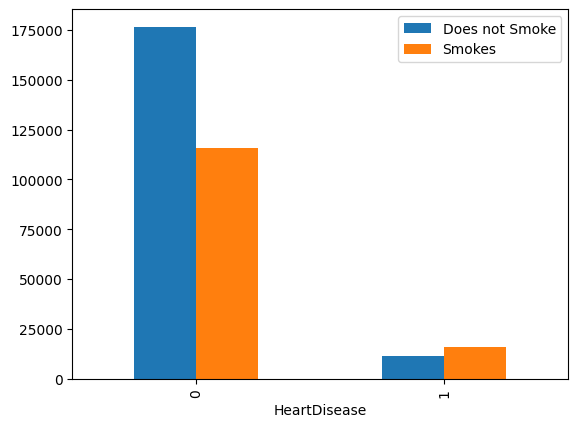

In [64]:
table.plot.bar()

From the graph, it can be seen that, when it comes to people without Heart Diseases, there are more non-smokers than there are smokers. However, given that the total number of respondents are different:

In [65]:
heart_df['Smoking'].value_counts()

0    187887
1    131908
Name: Smoking, dtype: int64

There are more non-smokers than there are smokers, so the bar graph may be too misleading to perform a proper analysis simply based on the visualization. We can further assess the relationship by looking into the percentages:

In [66]:
non_smoking_df = heart_df[heart_df['Smoking'] == 0]
non_smoking_no_disease = non_smoking_df[non_smoking_df['HeartDisease']==0].shape[0]
non_smoking_with_disease = non_smoking_df[non_smoking_df['HeartDisease']==1].shape[0]

smoking_df = heart_df[heart_df['Smoking'] == 1]
smoking_no_disease = non_smoking_df[non_smoking_df['HeartDisease']==0].shape[0]
smoking_with_disease = non_smoking_df[non_smoking_df['HeartDisease']==1].shape[0]

print('Non-smokers with no Heart Disease:', non_smoking_no_disease)
print('Non-smokers with Heart Disease:', non_smoking_with_disease, '\n')

print('Smokers with no Heart Disease:', smoking_no_disease)
print('Smokers with no Heart Disease:', smoking_with_disease, '\n')

print('Percentage of non-smokers with Heart Disease: {:.2f}%'.format(non_smoking_with_disease/non_smoking_df.shape[0] * 100))
print('Percentage of smokers with Heart Disease: {:.2f}%'.format(smoking_with_disease/smoking_df.shape[0] * 100))

Non-smokers with no Heart Disease: 176551
Non-smokers with Heart Disease: 11336 

Smokers with no Heart Disease: 176551
Smokers with no Heart Disease: 11336 

Percentage of non-smokers with Heart Disease: 6.03%
Percentage of smokers with Heart Disease: 8.59%


As seen above, when taking proportion and percentages into account, the percentage of smokers with a Heart Disease is higher than the percentage of the non-smokers with a Heart Disease. With that, one final measure must be taken to make sure that there is actually a correlation. Using a combination of the Pearson's Chi-Squared Test and using the Chi-square value from the test to solve for Cramer's V, we should be able to tell if there's an association between the two variables.

In [67]:
chiresults = chi2_contingency(table, correction=True)
print(chiresults)

(3713.0331469808216, 0.0, 1, array([[171804.72588377, 120617.27411623],
       [ 16082.27411623,  11290.72588377]]))


We can now plug the chi-square value into the Cramer's V formula:

In [68]:
v = np.sqrt(chiresults[0]/np.sum(np.sum(table)))/1

print('{:.2f}'.format(v))

0.11


After computing, we end up with a Cramer's V of 0.11 that is just above the minimum threshold for suggesting a weak but present relationship between the two variables. Therefore, we can conclude that there is an association between Smoking and Heart Disease.

## Formulated Research Question

Our exploratory data analysis has only tackled 3 of the 17 variables that can be measured on how much impact it has to an individual's risk of having a heart disease. It can be seen that certain health conditions and lifestyles may indicate or form a pattern that can lead to having the said health concern. Thus, our research aims to identify and answer the question:

**What are the most significant indicators or patterns of heart disease?** 

This question would only take into consideration the three variables that were already included within the Exploratory Data Analysis portion.

These three variables were picked because the World Health Organization (2021) has identified unhealthy eating habits, physical inactivity, tobacco usage, and excessive alcohol intake as key factors when it comes to heart disease.

This question is relevant because, in the context of the Philippines, heart disease continues to be a top cause of death among Filipinos during 2021 even in times of the Covid-19 pandemic. The Philippine Statistics Authority reported that 125,913 (17.9%) of the deaths during the pandemic died because of ischemic heart disease. Ranked after heart disease are: cerebrovascular disease (68,180 or 9.7%) and the Covid-19 virus (8,390 or 1.5%) (Kabagani, 2022). 

### References
Kabagani, L..(2022, February 23). Heart disease remains top cause of death in PH in 2021: PSA. Retrieved from: https://www.pna.gov.ph/articles/1168439<br>

World Health Organization. (2021). Cardiovascular diseases (CVDs). World Health Organization. Retrieved from: https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds) <br>

### IV. Data Mining
To answer the research question posed, it is best to use data mining techniques to aid the analysis. The data mining technique to be used will be Association Rule Mining. This way, we are able to find common trends and patterns among the variables we picked to see if any patterns emerge that can serve as potential, siginficant indicators of whether or not a person may be at risk of heart disease.

Before any Association Rule Mining can occur, the following code segment imports the necessary files and libraries to be used in data mining.

In [69]:
from rule_miner import RuleMiner
import scipy.stats as stats

Again, Association Rule Mining takes a list of related items and checks to see if any patterns between the items emerge. However, one of the variables we picked, that being BMI, is numerical in nature and can't be mined for any Association Rules in its current state.

In [70]:
heart_df['BMI']

0         16.60
1         20.34
2         26.58
3         24.21
4         23.71
          ...  
319790    27.41
319791    29.84
319792    24.24
319793    32.81
319794    46.56
Name: BMI, Length: 319795, dtype: float64

To rememedy this, we've decided to categorize BMI into 'Overweight', and 'Not Overweight'. The BMI categories state that a BMI of greater than or equal to 25 constitutes as 'Overweight', so we can now change our values to reflect that. To do this we created a new DataFrame with the relevant variables and the changed BMI:

In [71]:
new_df = pd.DataFrame()
new_df['Smoking'] = heart_df['Smoking']
new_df['Diabetic'] = heart_df['Diabetic']


temp = []
for i in heart_df['BMI']:
    if i >= 25:
        temp.append(1)
    else:
        temp.append(0)

new_df['Overweight'] = temp
new_df['HeartDisease'] = heart_df['HeartDisease']

print(new_df)

        Smoking  Diabetic  Overweight  HeartDisease
0             1         1           0             0
1             0         0           0             0
2             1         1           1             0
3             0         0           0             0
4             0         0           0             0
...         ...       ...         ...           ...
319790        1         1           1             1
319791        1         0           1             0
319792        0         0           0             0
319793        0         0           1             0
319794        0         0           1             0

[319795 rows x 4 columns]


Now that we have a viable dataset to compute for the association rules, we must set the threshold. Seeing as there are 319795 items in the dataset, we felt it was a good baseline to set the support threshold to roughly 10% of that at 3200, while setting the confidence threshold to 0.7.

Solving for the association rules using these variables we get the following rules:

In [72]:
new_miner = RuleMiner(3200, 0.7)
new_miner.get_association_rules(new_df)

[[['Diabetic', 'HeartDisease', 'Smoking'], ['Overweight']]]

The only rule found is {Diabetic, HeartDisease, Smoking} -> {Overweight}. <br><br>While no rules were found that may predict Heart Disease, we've at least found a trend/pattern that respondents who smoke, have a heart disease and have smoked at least 100 cigarettes in their lifetime are more likely to be overweight than not.

### V. Statistical Testing

Now that data mining has been performed, the appropriate statistical tests will be applied to the data to determine the significant indicator of heart disease.

### BMI

To determine whether BMI is a significant factor of heart disease, an independent t-test can be performed to conclusively show whether there is a statistically significant difference on the means of those with heart disease to those without.

In performing the mentioned test, it is assumed that the two samples are independent and that the population distributions are normal. 

Moreover, the null hypothesis for the statistical test is **"There is no statistically significant difference in the BMI between respondents with heart disease to those who do not have heart disease."**

The alternative hypothesis for the statistical test is **"There is a statistically significant difference in the BMI between respondents with heart disease to those who do not have heart disease."**

The level of significance for this test will initially be set to 0.05.

The following segment shows the calculation of the p-value. It uses the `hd_bmi` group from the exploratory data analysis section.

In [73]:
heart_bmi_0 = hd_bmi.loc[hd_bmi['HeartDisease'] == 0]
heart_bmi_1 = hd_bmi.loc[hd_bmi['HeartDisease'] == 1]

stats.ttest_ind(heart_bmi_0['BMI'], heart_bmi_1['BMI'])

Ttest_indResult(statistic=-29.33421693628801, pvalue=6.779455035549849e-189)

The calculated p-value for the test is 6.779455035549849e-189, which is statistically significant since the p-value is less than the critical value. The null hypothesis is rejected thus, there is a statistically significant difference in the BMI between respondents with no heart disease to those who have heart disease at a significance level of 0.05.

The result is also statistically significant at a level of 0.01 and 0.10. Therefore, **BMI is a significant factor in heart disease.**

### Diabetes

Given that the variables `Diabetic` and `HeartDisease` are categorical variables, we will apply the chi-square test to get the chi statistic and p-value, and examine if what we've observed from the EDA about diabetes is by chance or because of the relationship between the two.<br>
For this test, the null and the alternative are as follows:

Null hypothesis:        **Diabetes and heart disease are independent from one another**<br><br>
Alternative hypothesis: **Diabetes and heart disease are dependent on each other**


We formulate a table to get the relevant values:

In [74]:
hd_diabetic = heart_df.groupby('Diabetic')['HeartDisease'].value_counts()
diabetic_df = pd.DataFrame([hd_diabetic[0], hd_diabetic[1]], index=['Not diabetic', 'Diabetic']).transpose()
diabetic_df


,Not diabetic,Diabetic
HeartDisease,,
0,258126,34296
1,18308,9065


In [75]:
chi_results = chi2_contingency(diabetic_df, correction=True)
print("Chi statistic: {:.2f}".format(chi_results[0]))
print("P-value: {:.2f}".format(chi_results[1]))

Chi statistic: 9767.55
P-value: 0.00


The computed p-value of 0.0 is only an approximation of a very small and actual value. Therefore, at siginificance levels of 0.01, 0.5, and 0.1, we can reject the null hypothesis and accept the alternative hypothesis. <br><br>
In colcusion, diabetes and heart disease are dependent on each other.
    

### Smoking

To determine whether smoking is a significant factor when it comes to Heart Disease, the statistical inference to be used will be Pearon's Chi-square test. This was used before to calculate for Cramer's V, but the actual results of the Chi-square test weren't used to determine statistical inference. Here, we will be examining the Chi-square statistic, and its p-value to determine whether or not to reject the null and alternative hypothesis.

The null hypothesis for this test will be: <br>
    <b>Smoking and Heart Disease are independent from one another.</b>
    
    
While the alternative hypothesis will be:<br>
    <b>Smoking and Heart Disease are dependent on each other.</b>

Taking the relevant values, and grouping them to a table, we get this:

In [76]:
temp = heart_df.groupby('Smoking')['HeartDisease'].value_counts()
table = pd.DataFrame([temp[0], temp[1]], index=['Does not Smoke', 'Smokes']).transpose()
table

,Does not Smoke,Smokes
HeartDisease,,
0,176551,115871
1,11336,16037


Now, we can plug this table into Python's chi-contingency test to find the chi-statistic and the p-value, which is:

In [77]:
chiresults = chi2_contingency(table, correction=True)
print("Chi statistic {:.2f}".format(chiresults[0]))
print("P-value {:.2f}".format(chiresults[1]))

Chi statistic 3713.03
P-value 0.00


Though the function reports a p-score of 0.0, in reality, it is an approximation because the actual value is very small. 

Because of the small p-value and the high chi-statistic value (which is higher than the critical values of 0.01 , 0.05 and 0.10), it can be concluded that, there we can <b>reject</b> the null hypothesis, and accept the alternative that: 

<b>"The two variables, HeartDisease and Smoking, are dependent on each other</b>" 

At the significance levels of 0.01, 0.05 and 0.10.

### V. Insights and Conclusions

Our Formulated Research Question read as follows: **What are the most significant indicators or patterns of heart disease?** 

To set about doing this, we used the Association Rule Mining data modelling technique to find whether any of our variables, either by themselves or together, could be formed into significant rules that could potentially serve as indicators or patterns for heart disease.

In the end, only one rule emerged which is: {Diabetic, HeartDisease, Smoking} -> {Overweight}, which means that Diabetic people who Smoke and have a Heart Disease are more likely to be Overweight as well.

No rules that lead to Heart Disease were found despite our statistical tests showing significant differences and dependencies with the variables. This may be due to the low association of some of the variables picked or the amount of the variables picked in general.

If we were to redo this study again, we would find variables more closely associated to heart disease based on the applicable EDA, or widen our scope of variables in order to have more rules, which in-turn, could end with us finding a viable association rule that would lead to Heart Disease